In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
sales_data = pd.read_csv("/content/ECOMM DATA.xlsx - Orders.csv")

In [3]:
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/7/2012,31/7/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28/1/2013,30/1/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:

# Convert 'Order Date' to datetime format for time series analysis
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%d/%m/%Y')

# Total Sales Calculation
total_sales = sales_data['Sales'].sum()
print(f'Total Sales: ${total_sales:.2f}')

# Extract month and year from 'Order Date' for trend analysis
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.to_period('M')

# Aggregate sales by year and month
monthly_sales = sales_data.groupby('Month')['Sales'].sum()
yearly_sales = sales_data.groupby('Year')['Sales'].sum()




Total Sales: $12642501.91


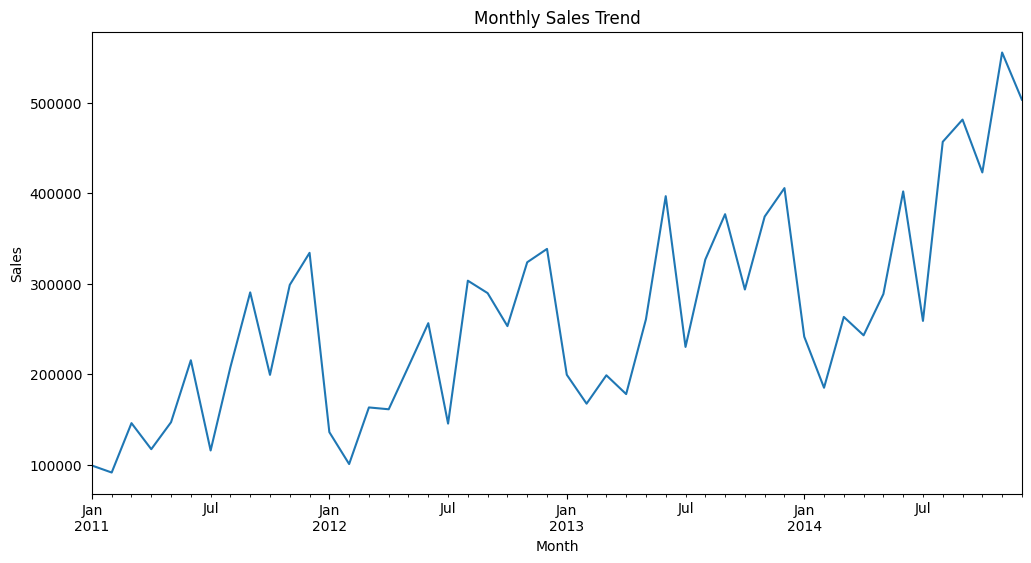

In [5]:
# Plot Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()



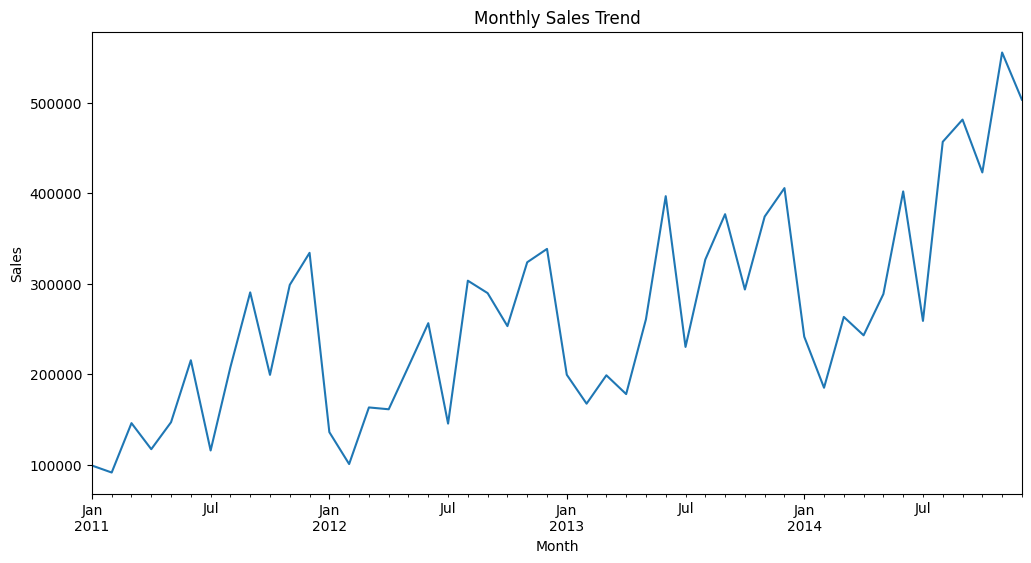

In [6]:
# Plot Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()



In [8]:

# Aggregate sales and quantity by product
product_sales = sales_data.groupby('Product Name').agg({'Sales': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=False)

# Top 5 Best-Selling Products by Sales
top_5_products_by_sales = product_sales.head(5)
print('Top 5 Best-Selling Products by Sales:')
print(top_5_products_by_sales)

# Top 5 Best-Selling Products by Quantity
top_5_products_by_quantity = product_sales.sort_values(by='Quantity', ascending=False).head(5)
print('Top 5 Best-Selling Products by Quantity:')
print(top_5_products_by_quantity)





Top 5 Best-Selling Products by Sales:
                                            Sales  Quantity
Product Name                                               
Apple Smart Phone, Full Size           86935.7786       171
Cisco Smart Phone, Full Size           76441.5306       139
Motorola Smart Phone, Full Size        73156.3030       134
Nokia Smart Phone, Full Size           71904.5555       147
Canon imageCLASS 2200 Advanced Copier  61599.8240        20
Top 5 Best-Selling Products by Quantity:
                                            Sales  Quantity
Product Name                                               
Staples                                 7008.2000       876
Cardinal Index Tab, Clear               1922.8302       337
Eldon File Cart, Single Width          34387.7287       321
Rogers File Cart, Single Width         29466.3053       262
Sanford Pencil Sharpener, Water Color   5581.9741       259


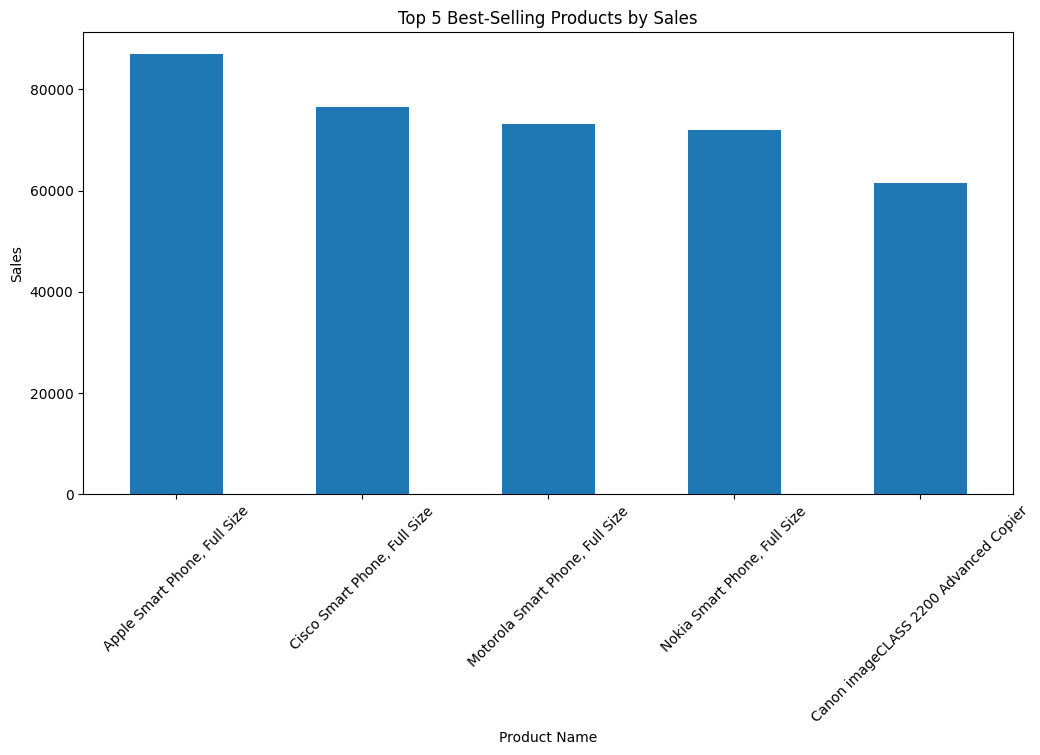

In [9]:

# Plot Top 5 Best-Selling Products by Sales
plt.figure(figsize=(12, 6))
top_5_products_by_sales['Sales'].plot(kind='bar')
plt.title('Top 5 Best-Selling Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()




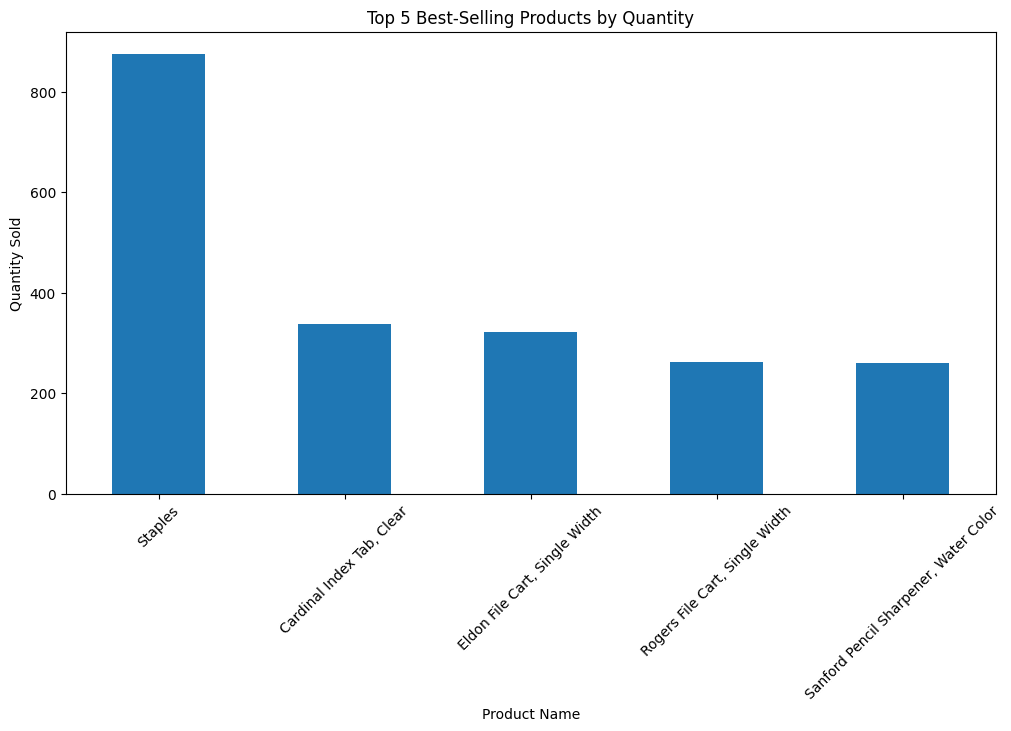

In [10]:

# Plot Top 5 Best-Selling Products by Quantity
plt.figure(figsize=(12, 6))
top_5_products_by_quantity['Quantity'].plot(kind='bar')
plt.title('Top 5 Best-Selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()



In [11]:

# Total Sales Calculation
total_sales = sales_data['Sales'].sum()

# Average Sales per Order
average_sales_per_order = sales_data['Sales'].mean()

# Total Profit Calculation
total_profit = sales_data['Profit'].sum()

# Print the computed revenue measures
print(f'Total Sales: ${total_sales:.2f}')
print(f'Average Sales per Order: ${average_sales_per_order:.2f}')
print(f'Total Profit: ${total_profit:.2f}')


Total Sales: $12642501.91
Average Sales per Order: $246.49
Total Profit: $1467457.29


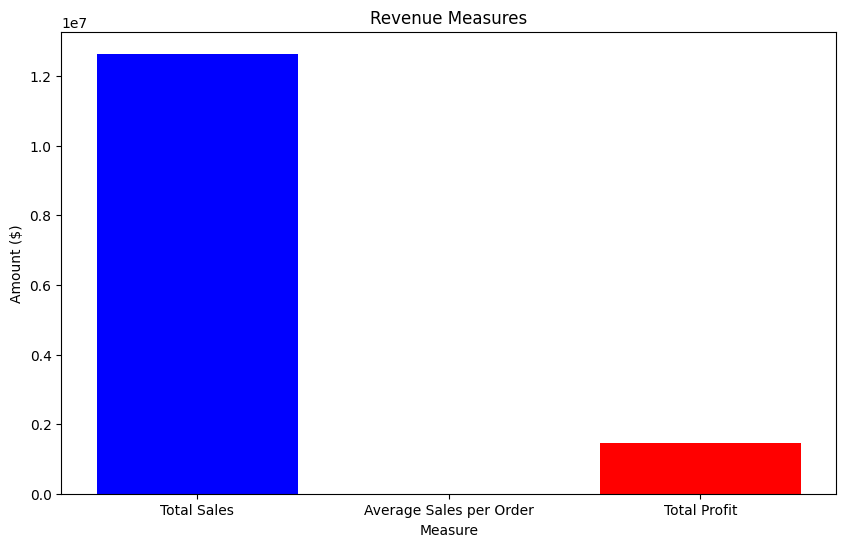

In [12]:
# Prepare data for plotting
revenue_measures = {
    'Total Sales': total_sales,
    'Average Sales per Order': average_sales_per_order,
    'Total Profit': total_profit
}

# Plot the revenue measures
plt.figure(figsize=(10, 6))
plt.bar(revenue_measures.keys(), revenue_measures.values(), color=['blue', 'green', 'red'])
plt.title('Revenue Measures')
plt.xlabel('Measure')
plt.ylabel('Amount ($)')
plt.show()